<h1>Package Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

<h1> Data Retrieval

<h2> 30-Year Fixed Rate Mortgage Average in the United States (MORTGAGE30US)

In [2]:
#import flat file
mortgage_data = pd.read_csv("./Data/MORTGAGE30US.csv")

In [3]:
#Convert observation_date to datetime
mortgage_data['observation_date'] = pd.to_datetime(mortgage_data['observation_date'])
#Create record_date with MM-YYYY format
mortgage_data['observation_date'] = mortgage_data['observation_date'].dt.strftime('%m-%Y')

#compute a monthly average
monthly_average = mortgage_data.groupby('observation_date')['MORTGAGE30US'].mean()
#sort by date
monthly_average.index = pd.to_datetime(monthly_average.index, format = '%m-%Y')
monthly_average = monthly_average.sort_index()
#convert to dataframe
mortgage_data = monthly_average.reset_index()
mortgage_data['observation_date'] = mortgage_data['observation_date'].dt.strftime('%m-%Y')

#Export file to csv
#mortgage_data.to_csv('./Data/30YFixedMortgage.csv')
mortgage_data.rename(columns={'observation_date': 'DATE'}, inplace=True)
mortgage_data

,DATE,MORTGAGE30US
0,04-1971,7.3100
1,05-1971,7.4250
2,06-1971,7.5300
3,07-1971,7.6040
4,08-1971,7.6975
...,...,...
626,06-2023,6.7140
627,07-2023,6.8400
628,08-2023,7.0720
629,09-2023,7.2000


<h2> Housing Inventory (ACTLISCOUUS)

In [4]:
#import flat file
housing_inventory = pd.read_csv("./Data/ACTLISCOUUS.csv")
housing_inventory['DATE'] = pd.to_datetime(housing_inventory['DATE'])
#Create record_date with MM-YYYY format
housing_inventory['DATE'] = housing_inventory['DATE'].dt.strftime('%m-%Y')

In [5]:
housing_inventory

,DATE,ACTLISCOUUS
0,07-2016,1462355.0
1,08-2016,1459457.0
2,09-2016,1442492.0
3,10-2016,1407001.0
4,11-2016,1339004.0
...,...,...
82,05-2023,582032.0
83,06-2023,613791.0
84,07-2023,646698.0
85,08-2023,669173.0


<h2> 10-Year Treasury Yield (BOGZ1FL073161113Q)

In [6]:
#import flat file
treasury_yield_y10 = pd.read_csv("./Data/BOGZ1FL073161113Q.csv")
treasury_yield_y10['DATE'] = pd.to_datetime(treasury_yield_y10['DATE'])
#Create record_date with MM-YYYY format
treasury_yield_y10['DATE'] = treasury_yield_y10['DATE'].dt.strftime('%m-%Y')

In [7]:
treasury_yield_y10

,DATE,BOGZ1FL073161113Q
0,01-1962,4016.0
1,04-1962,3876.0
2,07-1962,3990.0
3,10-1962,3902.0
4,01-1963,3892.0
...,...,...
241,04-2022,2933.0
242,07-2022,3101.0
243,10-2022,3827.0
244,01-2023,3646.0


<h2> Household Net Worth (BOGZ1FL192090005Q)

In [8]:
#import flat file
household_net_worth = pd.read_csv("./Data/BOGZ1FL192090005Q.csv")
household_net_worth['DATE'] = pd.to_datetime(household_net_worth['DATE'])
#Create record_date with MM-YYYY format
household_net_worth['DATE'] = household_net_worth['DATE'].dt.strftime('%m-%Y')

In [9]:
household_net_worth

,DATE,BOGZ1FL192090005Q
0,10-1987,17416833.0
1,01-1988,17905198.0
2,04-1988,18317489.0
3,07-1988,18620940.0
4,10-1988,19105872.0
...,...,...
138,04-2022,139044812.0
139,07-2022,136243387.0
140,10-2022,137638929.0
141,01-2023,140582462.0


<h2> Consumer Price Index for Urban (CPIAUCSL)

In [10]:
#import flat file
consumer_price_index = pd.read_csv("./Data/CPIAUCSL.csv")
consumer_price_index['DATE'] = pd.to_datetime(consumer_price_index['DATE'])
#Create record_date with MM-YYYY format
consumer_price_index['DATE'] = consumer_price_index['DATE'].dt.strftime('%m-%Y')

In [11]:
consumer_price_index

,DATE,CPIAUCSL
0,01-1947,21.480
1,02-1947,21.620
2,03-1947,22.000
3,04-1947,22.000
4,05-1947,21.950
...,...,...
916,05-2023,303.294
917,06-2023,303.841
918,07-2023,304.348
919,08-2023,306.269


<h2> Real Gross Domestic Product (GDPC1)

In [12]:
#import flat file
real_gdp = pd.read_csv("./Data/GDPC1.csv")
real_gdp['DATE'] = pd.to_datetime(real_gdp['DATE'])
#Create record_date with MM-YYYY format
real_gdp['DATE'] = real_gdp['DATE'].dt.strftime('%m-%Y')

In [13]:
real_gdp

,DATE,GDPC1
0,01-1947,2182.681
1,04-1947,2176.892
2,07-1947,2172.432
3,10-1947,2206.452
4,01-1948,2239.682
...,...,...
301,04-2022,21708.160
302,07-2022,21851.134
303,10-2022,21989.981
304,01-2023,22112.329


<h2> Total Public Debt (GFDEBTN)

In [14]:
#import flat file
total_public_debt = pd.read_csv("./Data/GFDEBTN.csv")
total_public_debt['DATE'] = pd.to_datetime(total_public_debt['DATE'])
#Create record_date with MM-YYYY format
total_public_debt['DATE'] = total_public_debt['DATE'].dt.strftime('%m-%Y')

In [15]:
total_public_debt

,DATE,GFDEBTN
0,01-1966,320999.0
1,04-1966,316097.0
2,07-1966,324748.0
3,10-1966,329319.0
4,01-1967,330947.0
...,...,...
225,04-2022,30568582.0
226,07-2022,30928912.0
227,10-2022,31419689.0
228,01-2023,31458438.0


<h2> Industrial Production (INDPRO)

In [16]:
#import flat file
industrial_production = pd.read_csv("./Data/INDPRO.csv")
industrial_production['DATE'] = pd.to_datetime(industrial_production['DATE'])
#Create record_date with MM-YYYY format
industrial_production['DATE'] = industrial_production['DATE'].dt.strftime('%m-%Y')

In [17]:
industrial_production

,DATE,INDPRO
0,01-1919,4.8665
1,02-1919,4.6514
2,03-1919,4.5170
3,04-1919,4.5976
4,05-1919,4.6245
...,...,...
1251,04-2023,103.1274
1252,05-2023,102.7864
1253,06-2023,102.3673
1254,07-2023,103.0920


<h2> Consumer Goods (IPCONGD)

In [18]:
#import flat file
consumer_goods = pd.read_csv("./Data/IPCONGD.csv")
consumer_goods['DATE'] = pd.to_datetime(consumer_goods['DATE'])
#Create record_date with MM-YYYY format
consumer_goods['DATE'] = consumer_goods['DATE'].dt.strftime('%m-%Y')

In [19]:
consumer_goods

,DATE,IPCONGD
0,01-1939,11.8201
1,02-1939,11.8201
2,03-1939,12.0139
3,04-1939,12.0139
4,05-1939,12.0526
...,...,...
1011,04-2023,103.6524
1012,05-2023,102.8448
1013,06-2023,101.5389
1014,07-2023,102.7410


<h2> 90-Day Rates and Yields (IR3TIB01USM156N)

In [20]:
#import flat file
rates_90day = pd.read_csv("./Data/IR3TIB01USM156N.csv")
rates_90day['DATE'] = pd.to_datetime(rates_90day['DATE'])
#Create record_date with MM-YYYY format
rates_90day['DATE'] = rates_90day['DATE'].dt.strftime('%m-%Y')

In [21]:
rates_90day

,DATE,IR3TIB01USM156N
0,06-1964,3.86
1,07-1964,3.87
2,08-1964,3.85
3,09-1964,3.87
4,10-1964,3.94
...,...,...
707,05-2023,5.15
708,06-2023,5.22
709,07-2023,5.35
710,08-2023,5.44


<h2> Job Openings (JTSJOL)

In [22]:
#import flat file
job_openings = pd.read_csv("./Data/JTSJOL.csv")
job_openings['DATE'] = pd.to_datetime(job_openings['DATE'])
#Create record_date with MM-YYYY format
job_openings['DATE'] = job_openings['DATE'].dt.strftime('%m-%Y')

In [23]:
job_openings

,DATE,JTSJOL
0,12-2000,5088
1,01-2001,5234
2,02-2001,5097
3,03-2001,4762
4,04-2001,4615
...,...,...
268,04-2023,10320
269,05-2023,9616
270,06-2023,9165
271,07-2023,8920


<h2> Velocity of M2 Money Stock (M2V)

In [24]:
#import flat file
money_velocity = pd.read_csv("./Data/M2V.csv")
money_velocity['DATE'] = pd.to_datetime(money_velocity['DATE'])
#Create record_date with MM-YYYY format
money_velocity['DATE'] = money_velocity['DATE'].dt.strftime('%m-%Y')

In [25]:
money_velocity

,DATE,M2V
0,01-1959,1.773
1,04-1959,1.789
2,07-1959,1.773
3,10-1959,1.779
4,01-1960,1.817
...,...,...
253,04-2022,1.179
254,07-2022,1.202
255,10-2022,1.234
256,01-2023,1.273


<h2> Producer Price Index for All Commodities (PPIACO)

In [26]:
#import flat file
producer_price_index = pd.read_csv("./Data/PPIACO.csv")
producer_price_index['DATE'] = pd.to_datetime(producer_price_index['DATE'])
#Create record_date with MM-YYYY format
producer_price_index['DATE'] = producer_price_index['DATE'].dt.strftime('%m-%Y')

In [27]:
producer_price_index

,DATE,PPIACO
0,01-1913,12.100
1,02-1913,12.000
2,03-1913,12.000
3,04-1913,12.000
4,05-1913,11.900
...,...,...
1324,05-2023,253.670
1325,06-2023,253.908
1326,07-2023,253.889
1327,08-2023,257.813


<h2> Unemployment Rate (UNRATE)

In [28]:
#import flat file
unemployment_rate = pd.read_csv("./Data/UNRATE.csv")
unemployment_rate['DATE'] = pd.to_datetime(unemployment_rate['DATE'])
#Create record_date with MM-YYYY format
unemployment_rate['DATE'] = unemployment_rate['DATE'].dt.strftime('%m-%Y')

In [29]:
unemployment_rate

,DATE,UNRATE
0,01-1948,3.4
1,02-1948,3.8
2,03-1948,4.0
3,04-1948,3.9
4,05-1948,3.5
...,...,...
904,05-2023,3.7
905,06-2023,3.6
906,07-2023,3.5
907,08-2023,3.8


<h2> M2 Money Supply (WM2NS)

In [30]:
#import flat file
money_supply = pd.read_csv("./Data/WM2NS.csv")
money_supply['DATE'] = pd.to_datetime(money_supply['DATE'])
#Create record_date with MM-YYYY format
money_supply['DATE'] = money_supply['DATE'].dt.strftime('%m-%Y')

#compute a monthly average
monthly_average = money_supply.groupby('DATE')['WM2NS'].mean()
#sort by date
monthly_average.index = pd.to_datetime(monthly_average.index, format = '%m-%Y')
monthly_average = monthly_average.sort_index()
#convert to dataframe
money_supply = monthly_average.reset_index()
money_supply['DATE'] = money_supply['DATE'].dt.strftime('%m-%Y')

In [31]:
money_supply

,DATE,WM2NS
0,11-1980,1598.525
1,12-1980,1603.140
2,01-1981,1612.900
3,02-1981,1608.125
4,03-1981,1629.400
...,...,...
510,05-2023,20726.800
511,06-2023,20806.175
512,07-2023,20790.300
513,08-2023,20757.600


<h1> Merge Dataset

In [32]:
compiled_dataset = mortgage_data.merge(consumer_price_index,how='inner',on='DATE')
compiled_dataset = compiled_dataset.merge(industrial_production,how='inner',on='DATE')
compiled_dataset = compiled_dataset.merge(consumer_goods,how='inner',on='DATE')
compiled_dataset = compiled_dataset.merge(rates_90day,how='inner',on='DATE')
compiled_dataset = compiled_dataset.merge(producer_price_index,how='inner',on='DATE')
compiled_dataset = compiled_dataset.merge(unemployment_rate,how='inner',on='DATE')
compiled_dataset['3monthForecast'] = compiled_dataset['MORTGAGE30US'].shift(-3)
compiled_dataset['6monthForecast'] = compiled_dataset['MORTGAGE30US'].shift(-6)
compiled_dataset['12monthForecast'] = compiled_dataset['MORTGAGE30US'].shift(-12)

In [33]:
compiled_dataset.tail(5)

,DATE,MORTGAGE30US,CPIAUCSL,INDPRO,IPCONGD,IR3TIB01USM156N,PPIACO,UNRATE,3monthForecast,6monthForecast,12monthForecast
624,04-2023,6.3425,302.918,103.1274,103.6524,5.03,256.908,3.4,6.840,NaN,NaN
625,05-2023,6.4250,303.294,102.7864,102.8448,5.15,253.670,3.7,7.072,NaN,NaN
626,06-2023,6.7140,303.841,102.3673,101.5389,5.22,253.908,3.6,NaN,NaN,NaN
627,07-2023,6.8400,304.348,103.0920,102.7410,5.35,253.889,3.5,NaN,NaN,NaN
628,08-2023,7.0720,306.269,103.4886,102.5417,5.44,257.813,3.8,NaN,NaN,NaN


In [34]:
cleaned_dataset = compiled_dataset.dropna()
cleaned_dataset.tail(5)

,DATE,MORTGAGE30US,CPIAUCSL,INDPRO,IPCONGD,IR3TIB01USM156N,PPIACO,UNRATE,3monthForecast,6monthForecast,12monthForecast
612,04-2022,4.9825,288.611,102.7953,103.8367,0.91,265.310,3.6,5.4125,6.9000,6.3425
613,05-2022,5.2300,291.268,102.7769,103.1535,1.33,273.251,3.6,5.2225,6.8050,6.4250
614,06-2022,5.5220,294.728,102.6863,102.7747,1.87,280.251,3.6,6.1120,6.3640,6.7140
615,07-2022,5.4125,294.628,103.1328,102.6928,2.50,272.274,3.5,6.9000,6.2725,6.8400
616,08-2022,5.2225,295.320,103.2344,103.0030,2.76,269.546,3.7,6.8050,6.2575,7.0720


<h1> Analyze Training & Testing Set Sizes

<h2> 10% training set

RSME =  1.03
MSE =  1.0617198167498836
MAE =  0.7868531979506868
R2 =  0.9015412120285051


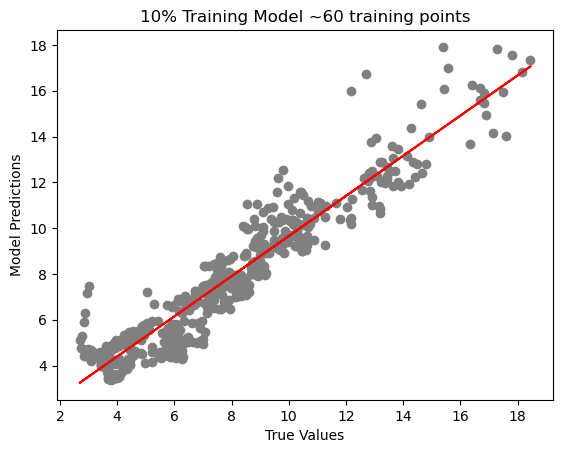

In [35]:
X = cleaned_dataset.drop(['DATE','MORTGAGE30US','3monthForecast', '6monthForecast', '12monthForecast'], axis = 1)
y = cleaned_dataset['3monthForecast']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state=2023)

#Train forecast model
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

#Test 3 month forecast
y_predict = regressor.predict(X_test)

#Evaluate Model
slope, intercept = np.polyfit(y_test, y_predict, 1)
plt.scatter(y_test, y_predict, color = 'gray')
plt.plot(y_test, slope * y_test + intercept, color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('10% Training Model ~60 training points')

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print('RSME = ', RMSE)
print('MSE = ', MSE)
print('MAE = ', MAE)
print('R2 = ', r2)

<h2> 20% training set

RSME =  0.985
MSE =  0.9705983202676235
MAE =  0.7595478625358806
R2 =  0.9089105244651127


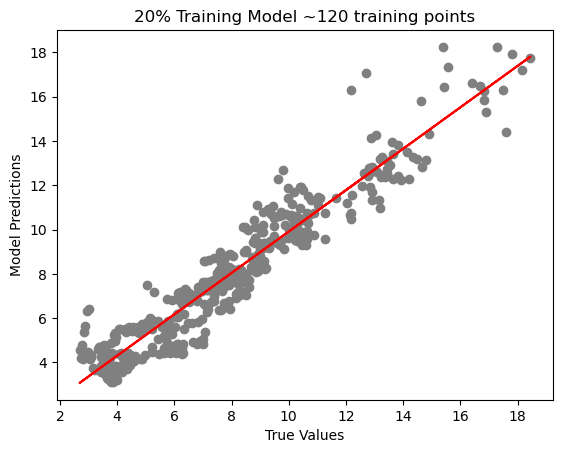

In [36]:
X = cleaned_dataset.drop(['DATE','MORTGAGE30US','3monthForecast', '6monthForecast', '12monthForecast'], axis = 1)
y = cleaned_dataset['3monthForecast']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=2023)

#Train forecast model
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

#Test 3 month forecast
y_predict = regressor.predict(X_test)

#Evaluate Model
slope, intercept = np.polyfit(y_test, y_predict, 1)
plt.scatter(y_test, y_predict, color = 'gray')
plt.plot(y_test, slope * y_test + intercept, color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('20% Training Model ~120 training points')

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print('RSME = ', RMSE)
print('MSE = ', MSE)
print('MAE = ', MAE)
print('R2 = ', r2)

<h2> 50% training set

RSME =  0.91
MSE =  0.8282566034240826
MAE =  0.7370772160677719
R2 =  0.9214468515625428


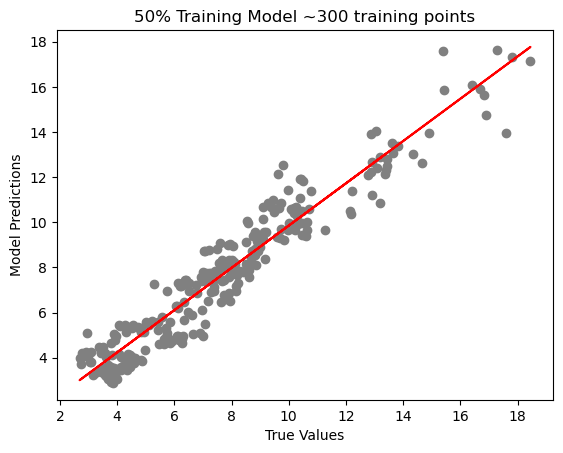

In [37]:
X = cleaned_dataset.drop(['DATE','MORTGAGE30US','3monthForecast', '6monthForecast', '12monthForecast'], axis = 1)
y = cleaned_dataset['3monthForecast']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=2023)

#Train forecast model
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

#Test 3 month forecast
y_predict = regressor.predict(X_test)

#Evaluate Model
slope, intercept = np.polyfit(y_test, y_predict, 1)
plt.scatter(y_test, y_predict, color = 'gray')
plt.plot(y_test, slope * y_test + intercept, color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('50% Training Model ~300 training points')

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print('RSME = ', RMSE)
print('MSE = ', MSE)
print('MAE = ', MAE)
print('R2 = ', r2)

<h2> 80% training set

RSME =  0.895
MSE =  0.8017254402105098
MAE =  0.6981429113338216
R2 =  0.9378885851304423


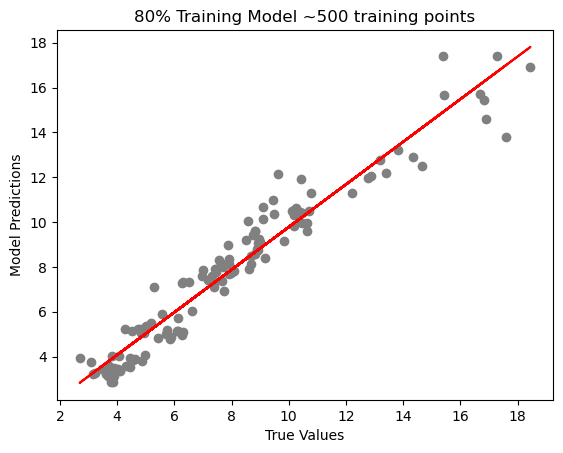

In [38]:
X = cleaned_dataset.drop(['DATE','MORTGAGE30US','3monthForecast', '6monthForecast', '12monthForecast'], axis = 1)
y = cleaned_dataset['3monthForecast']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2023)

#Train forecast model
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

#Test 3 month forecast
y_predict = regressor.predict(X_test)

#Evaluate Model
slope, intercept = np.polyfit(y_test, y_predict, 1)
plt.scatter(y_test, y_predict, color = 'gray')
plt.plot(y_test, slope * y_test + intercept, color='red')
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.title('80% Training Model ~500 training points')

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print('RSME = ', RMSE)
print('MSE = ', MSE)
print('MAE = ', MAE)
print('R2 = ', r2)

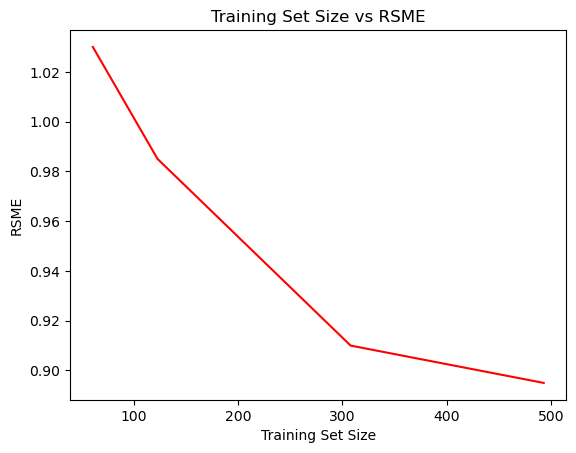

In [39]:
training_set_size = [61,123,308,493]
rsme_set = [1.03,0.985,0.91,0.895]
r2_set = [0.9015412120285051,0.9089105244651127,0.9214468515625428,0.9378885851304423]

training_size_vs_rsme = pd.DataFrame({'Training Set Size': training_set_size, 'RSME': rsme_set})
training_size_vs_r2 = pd.DataFrame({'Training Set Size': training_set_size, 'R2': r2_set})

sns.lineplot(x="Training Set Size", y="RSME", data=training_size_vs_rsme, color="Red")
plt.title('Training Set Size vs RSME')
plt.show()

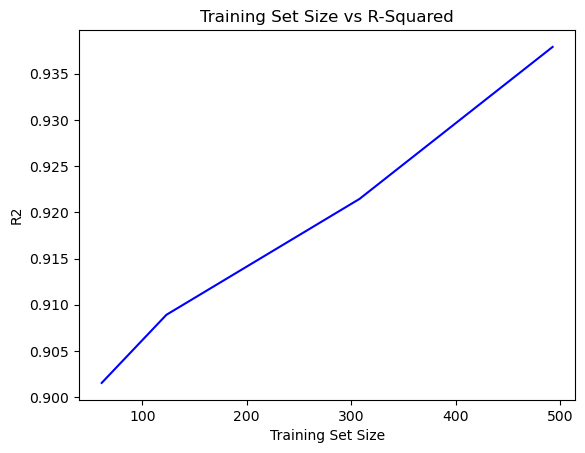

In [40]:
sns.lineplot(x="Training Set Size", y="R2", data=training_size_vs_r2, color="Blue")
plt.title('Training Set Size vs R-Squared')
plt.show()